# COMANDO DA QUESTÃO B

Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho. Produza dados artificiais, plote o histograma e a distribuição que aproxime os dados. Em seguida, defina estudos como o exemplo da pizza explicado em sala, sempre partido da versão não padronizada e depois os cálculos na versão padronizada.  Sempre considerando o contexto do seu primeiro trabalho.Use uma função de Python e uma tabela para obter os valores de probabilidade.


Meu trabalho é sobre assistentes inteligentes no desenvolvimento de software com foco na experiência do usuário com o objetivo de criar ou melhorar um assistente (como um plugin de IDE, chatbot, etc.) que ajude desenvolvedores em suas tarefas (escrever código, depurar, refatorar, encontrar documentação), tornando essa interação mais eficiente, agradável e menos frustrante.

A variável de interesse a ser analisada será o tempo (em minutos) para a conclusão de uma tarefa de codificação específica. Será medido quanto tempo um grupo de devs leva para completar uma tarefa padronizada utilizando o Assistente Inteligente. A hipótese é de que com o auxilio do Assistente Inteligente, o tempo médio necessário para concluir a tarefa seja reduzido em comparação com um cenário sem o mesmo.

Vamos supor que, com base em estudos piloto ou expectativas, o tempo de conclusão da tarefa (X) usando o assistente siga aproximadamente uma distribuição Normal.

Parâmetros Supostos: Média (μ): 30 minutos e Desvio Padrão (σ): 5 minutos

A geração dos dados artificiais será feita com 200 pontos de dados simulados em python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# Parâmetros da distribuição Normal
media_tempo = 30  # Média (mu) em minutos
desvio_padrao_tempo = 5 # Desvio padrão (sigma) em minutos
num_amostras = 200 # Número de desenvolvedores/dados simulados

# Gerar dados artificiais
# Definir uma semente para reprodutibilidade
np.random.seed(42)
tempos_conclusao = np.random.normal(loc=media_tempo, scale=desvio_padrao_tempo, size=num_amostras)

# Garantir que não haja tempos negativos (embora improvável com esses parâmetros)
tempos_conclusao = np.maximum(tempos_conclusao, 1) # Define um tempo mínimo de 1 min, se necessário

# Plotar Histograma e Distribuição Teórica
plt.figure(figsize=(10, 6))
# Histograma dos dados artificiais
count, bins, ignored = plt.hist(tempos_conclusao, bins=15, density=True, alpha=0.7, color='skyblue', label='Histograma dos Dados Simulados')

# Curva da distribuição Normal teórica
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, media_tempo, desvio_padrao_tempo)
plt.plot(x, p, 'k', linewidth=2, label=f'Distribuição Normal Teórica\n($\mu={media_tempo}, \sigma={desvio_padrao_tempo}$)')

plt.title('Histograma e Distribuição Normal Aproximada\nTempo de Conclusão da Tarefa com Assistente Inteligente')
plt.xlabel('Tempo de Conclusão (minutos)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

# Exibir alguns dados gerados
print("Primeiros 10 tempos de conclusão simulados (minutos):")
print(tempos_conclusao[:10].round(2))

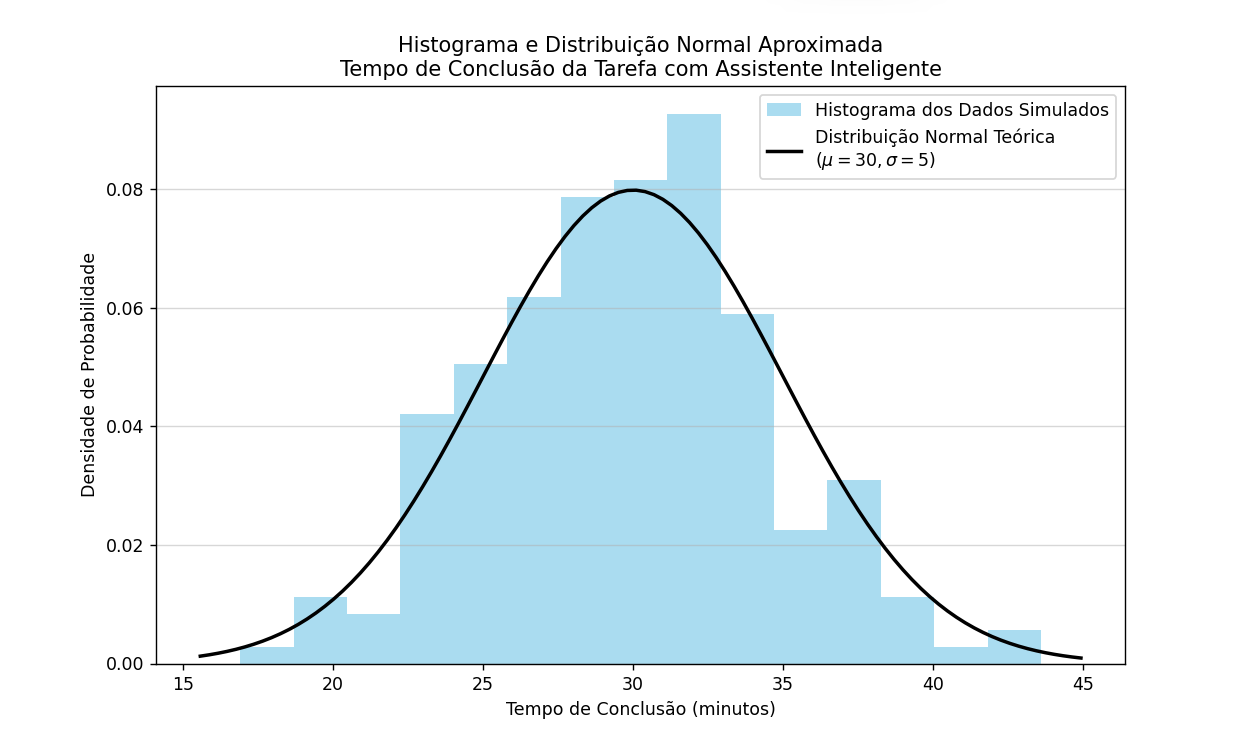

O código acima irá gerar um gráfico mostrando o histograma dos dados simulados (barras azuis) e a curva da distribuição normal teórica (linha preta) que usamos para gerar os dados, mostrando uma boa aproximação.

Primeiros 10 tempos de conclusão simulados (minutos):

[32.48 29.31 33.24 37.62 28.83 28.83 37.9  33.84 27.65 32.71]

Estudo das probabiblidades no estilo pizza do exemplo em sala.

Agora seram analisadas as probabilidades relacionadas ao tempo de conclusão da tarefa usando a distribuição normal assumida (μ=30,σ=5).


Cenário 1: Qual a probabilidade de um desenvolvedor terminar a tarefa em menos de 25 minutos (terminar rapidamente)?

Versão Não Padronizada (Usando X):

Queremos calcular P(X<25).

Usando a função de distribuição acumulada (CDF) da Normal:

P(X<25)=CDF(25,μ=30,σ=5)

Versão Padronizada (Usando Z): Primeiro, calculamos o Z-score para X=25:

Z=
σ
X−μ
​
 =
5
25−30
​
 =
5
−5
​
 =−1.0

Agora, queremos calcular

P(Z<−1.0).
P(Z<−1.0)=CDF
standard
​
 (−1.0)

 ---
 Notação: P(X<25)

Cálculo (Não Padronizado):

CDF(25,μ=30,σ=5)

Cálculo (Padronizado):

Z=(25−30)/5=−1.0
P(Z<−1.0)

Resultado: ≈0.1587 (ou 15.87%)

Cenário 2: Qual a probabilidade de um desenvolvedor levar mais de 38 minutes para concluir (levar mais tempo que o esperado)?

Versão Não Padronizada (Usando X): Queremos calcular P(X>38).

P(X>38)=1−P(X≤38)=1−CDF(38,μ=30,σ=5)

Versão Padronizada (Usando Z):
Calculamos o Z-score para X=38:

Z=
5
38−30
​
 =
5
8
​
 =1.6


Agora, queremos calcular P(Z>1.6).

P(Z>1.6)=1−P(Z≤1.6)=1−CDF
standard
​
 (1.6)

----
Notação: P(X>38)

Cálculo (Não Padronizado):

1−CDF(38,μ=30,σ=5)

Cálculo (Padronizado):

Z=(38−30)/5=1.6
P(Z>1.6)=1−P(Z≤1.6)

Resultado: ≈ 0.0548 (ou 5.48%)

Cenário 3: Qual a probabilidade de um desenvolvedor levar entre 28 e 35 minutos para concluir (tempo considerado "típico")?

Versão Não Padronizada (Usando X):
Queremos calcular P(28<X<35).

P(28<X<35)=P(X<35)−P(X≤28)

P(28<X<35)=CDF(35,μ=30,σ=5)−CDF(28,μ=30,σ=5)

Versão Padronizada (Usando Z):
Calculamos os Z-scores para X=28 e X=35:

Z
1
​
 =
5
28−30
​
 =
5
−2
​
 =−0.4
Z
2
​
 =
5
35−30
​
 =
5
5
​
 =1.0

Agora, queremos calcular P(−0.4<Z<1.0).

P(−0.4<Z<1.0)=P(Z<1.0)−P(Z≤−0.4)

P(−0.4<Z<1.0)=CDF
standard
​
 (1.0)−CDF
standard
​
 (−0.4)

 ---
 Notação: P(28<X<35)

Cálculo (Não Padronizado):
CDF(35,...)−CDF(28,...)

Cálculo (Padronizado):
Z
1
​
 =(28−30)/5=−0.4
Z
2
​
 =(35−30)/5=1.0

P(−0.4<Z<1.0)=P(Z<1.0)−P(Z≤−0.4)

Resultado: ≈0.4972 (ou 49.72%)

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
# Parâmetros
mu = 30
sigma = 5

# Cenário 1: P(X < 25)
prob_cenario1_x = stats.norm.cdf(25, loc=mu, scale=sigma)
z1 = (25 - mu) / sigma
prob_cenario1_z = stats.norm.cdf(z1) # CDF da Normal Padrão (mu=0, sigma=1)

# Cenário 2: P(X > 38)
prob_cenario2_x = 1 - stats.norm.cdf(38, loc=mu, scale=sigma)
z2 = (38 - mu) / sigma
prob_cenario2_z = 1 - stats.norm.cdf(z2)

# Cenário 3: P(28 < X < 35)
prob_cenario3_x = stats.norm.cdf(35, loc=mu, scale=sigma) - stats.norm.cdf(28, loc=mu, scale=sigma)
z3_lower = (28 - mu) / sigma
z3_upper = (35 - mu) / sigma
prob_cenario3_z = stats.norm.cdf(z3_upper) - stats.norm.cdf(z3_lower)

# Criar tabela de resultados
resultados = {
    'Cenário': [
        'Menos de 25 min (Rápido)',
        'Mais de 38 min (Lento)',
        'Entre 28 e 35 min (Típico)'
    ],
    'Notação (Não Padronizada)': [
        '$P(X < 25)$',
        '$P(X > 38)$',
        '$P(28 < X < 35)$'
    ],
    'Z-score(s)': [
        f'$Z = {z1:.2f}$',
        f'$Z = {z2:.2f}$',
        f'$Z_1 = {z3_lower:.2f}, Z_2 = {z3_upper:.2f}$'
    ],
     'Notação (Padronizada)': [
        f'$P(Z < {z1:.2f})$',
        f'$P(Z > {z2:.2f})$',
        f'$P({z3_lower:.2f} < Z < {z3_upper:.2f})$'
    ],
    'Probabilidade': [
        f'{prob_cenario1_x:.4f}', # ou prob_cenario1_z
        f'{prob_cenario2_x:.4f}', # ou prob_cenario2_z
        f'{prob_cenario3_x:.4f}'  # ou prob_cenario3_z
    ]
}

df_resultados = pd.DataFrame(resultados)

# Exibir a tabela
print("\nTabela de Probabilidades Calculadas:")
print(df_resultados.to_string(index=False))

# Verificação se os cálculos padronizados e não padronizados conferem (devem ser iguais)
print("\nVerificações (Probabilidade Não Padronizada vs Padronizada):")
print(f"Cenário 1: {prob_cenario1_x:.4f} vs {prob_cenario1_z:.4f}")
print(f"Cenário 2: {prob_cenario2_x:.4f} vs {prob_cenario2_z:.4f}")
print(f"Cenário 3: {prob_cenario3_x:.4f} vs {prob_cenario3_z:.4f}")

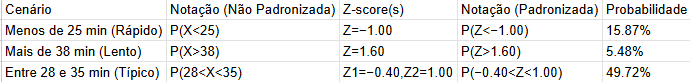